/home/amirahsaei/anaconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['transformer.encoder_layers.2.mlp.fc1.bias', 'transformer.encoder_layers.2.mlp.fc2.weight', 'transformer.encoder_layers.2.mlp.fc2.bias', 'transformer.encoder_layers.3.norm1.weight', 'transformer.encoder_layers.3.norm1.bias', 'transformer.encoder_layers.3.attn.query.weight', 'transformer.encoder_layers.3.attn.query.bias', 'transformer.encoder_layers.3.attn.key.weight', 'transformer.encoder_layers.3.attn.key.bias', 'transformer.encoder_layers.3.attn.value.weight', 'transformer.encoder_layers.3.attn.value.bias', 'transformer.encoder_layers.3.attn.out.weight', 'transformer.encoder_layers.3.attn.out.bias', 'transformer.encoder_layers.3.norm2.weight', 'transformer.encoder_layers.3.norm2.bias', 'transformer.encoder_layers.3.mlp.fc1.weight', 'transformer.encoder_layers.3.mlp.fc1.bias', 'transformer.encoder_layers.3.mlp.fc2.weight', 'transformer.encoder_layers.3.mlp.fc2.bias', 'transformer.encoder_layers.4.norm1.weight', 'transformer.encoder_layers.4.norm1.bias', 'transformer.encoder_layers.4.

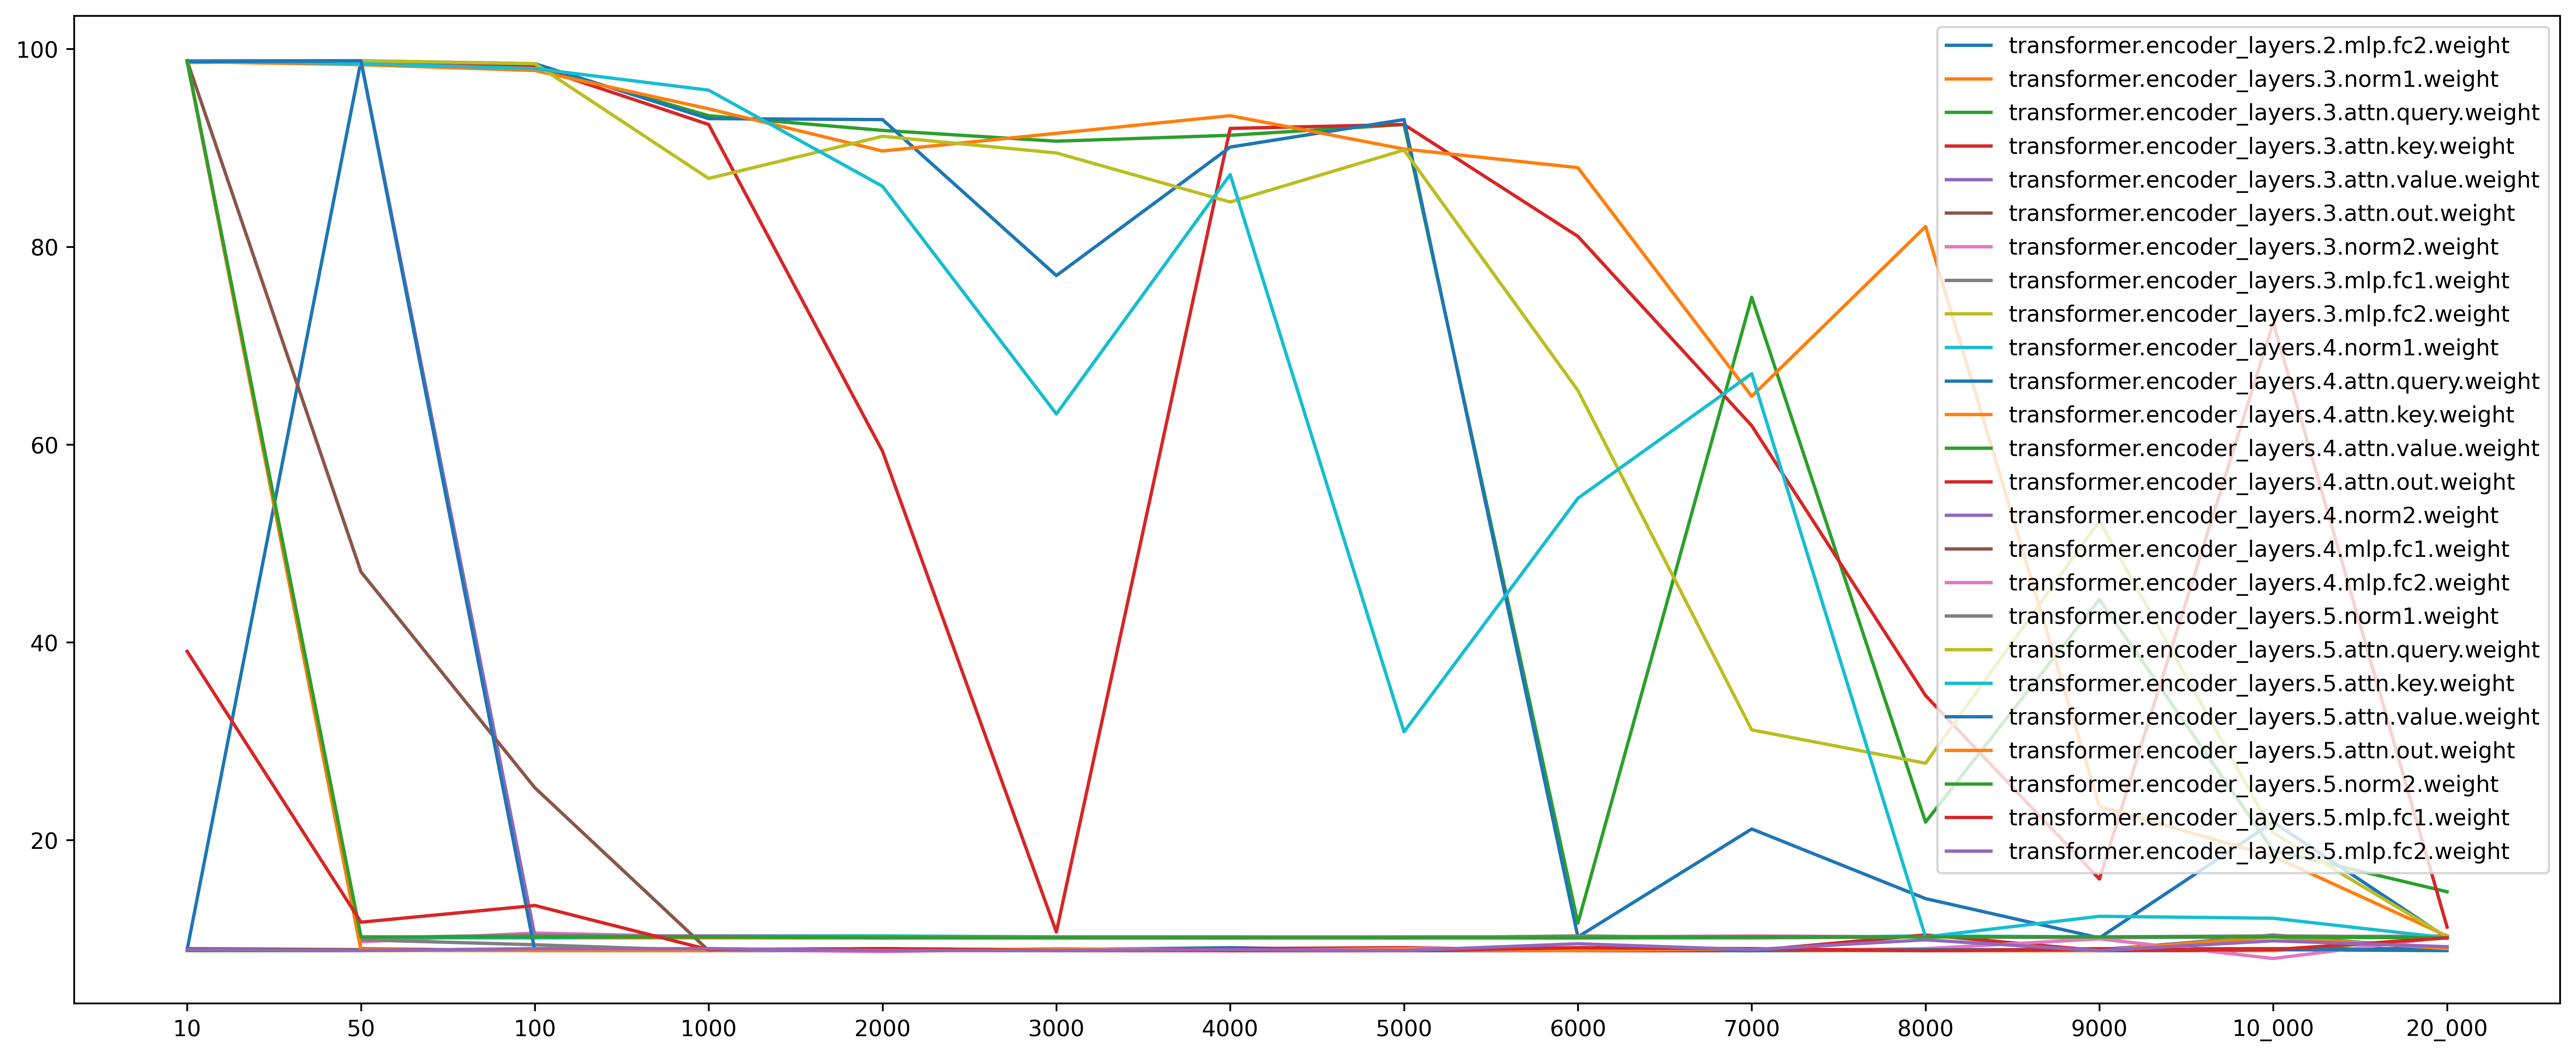

In [1]:
import torch

t = list(torch.load('par_result.pt'))


layer_names = []

for i in range(0, len(t)-1):
    if(t[i][0] != t[i+1][0]):
        layer_names.append(t[i][0])

print(layer_names)

y = []



for layer_name in layer_names:
    counter = 0
    for stat in t:
        if( stat[0] == layer_name):
            if(counter == 14):
                break
            y.append([stat[1]])
            counter+=1

#print(y)

final_list = []
par_list = []


for i in range(0, len(y), 14):
    for j in range(i, i+14):
        par_list.append(y[j])
    final_list.append(par_list)
    par_list = []

print(len(final_list))

# importing package
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
  
# create data
x = ['10', '50', '100', '1000', '2000', '3000', '4000', '5000', '6000', '7000', '8000', '9000', '10_000', '20_000'] ### BER

figure(figsize=(20, 8), dpi=600)

  
# plot lines

for i in range(0, 50):
    if "attn" and "weight" in layer_names[i]:
        plt.plot(x, final_list[i], label = layer_names[i], linestyle="-")





#plt.xticks([10, 50, 100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10_000, 20_000])
plt.legend()
plt.show()


In [24]:
import torch

t = list(torch.load('par_result_0.pt'))


layer_names = []

for i in range(0, len(t)-1):
    if(t[i][0] != t[i+1][0]):
        layer_names.append(t[i][0])


y = []

final_list = []

for layer_name in layer_names:
    counter = 0
    avg = 0
    for stat in t:
        if( stat[0] == layer_name):
            if(counter == 14):
                break
            y.append([stat[1]])
            counter+=1
            avg+=float(stat[1])
    final_list.append(avg/counter)



# importing package
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
  
# create data

figure(figsize=(30, 8), dpi=600)

  
# plot lines
print(layer_names[:5])

plt.bar(layer_names[0:20], final_list[0:20])
plt.xticks(rotation = 70)

#plt.xticks([10, 50, 100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10_000, 20_000])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['cls_token', 'embedding.weight', 'embedding.bias', 'transformer.pos_embedding.pos_embedding', 'transformer.encoder_layers.0.norm1.weight']


In [18]:
for i in range(0, len(y), 14):
    for j in range(i, i+14):
        print(j)
    print("done")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
done
14
15
16
17
18
19
20
21
22
23
24
25
26
27
done
28
29
30
31
32
33
34
35
36
37
38
39
40
41
done
42
43
44
45
46
47
48
49
50
51
52
53
54
55
done
56
57
58
59
60
61
62
63
64
65
66
67
68
69
done
70
71
72
73
74
75
76
77
78
79
80
81
82
83
done
84
85
86
87
88
89
90
91
92
93
94
95
96
97
done
98
99
100
101
102
103
104
105
106
107
108
109
110
111
done
112
113
114
115
116
117
118
119
120
121
122
123
124
125
done
126
127
128
129
130
131
132
133
134
135
136
137
138
139
done
140
141
142
143
144
145
146
147
148
149
150
151
152
153
done
154
155
156
157
158
159
160
161
162
163
164
165
166
167
done
168
169
170
171
172
173
174
175
176
177
178
179
180
181
done
182
183
184
185
186
187
188
189
190
191
192
193
194
195
done
196
197
198
199
200
201
202
203
204
205
206
207
208
209
done
210
211
212
213
214
215
216
217
218
219
220
221
222
223
done
224
225
226
227
228
229
230
231
232
233
234
235
236
237
done
238
239
240
241
242
243
244
245
246
247
248
249
250
251
done
252
253
254


In [21]:
import torch

list_1 = torch.load('par_result_0.pt')
list_2 = torch.load('par_result.pt')

print(list_1[-1])
print(list_2[-1])

print(type(list_1))

list_1.extend(list_2)

for i in range(0, len(list_1)-1):
     if (list_1[i][0] == list_1[i+1][0] and list_1[i][4] == list_1[i+1][4]):
        print(i)


['transformer.encoder_layers.2.mlp.fc2.weight', 10.218253968253968, 51.48809523809524, 2.316597999088348, 4000]
['transformer.encoder_layers.9.attn.query.bias', 10.218253968253968, 48.71031746031746, nan, 20000]
<class 'list'>


In [34]:
import torch 
import math 

list_1 = torch.load('./par_result_0.pt')
list_1.extend(torch.load('./par_result_1.pt'))
list_1.extend(torch.load('./par_result.pt'))

resil = list_1


layer_names = []
resil_list = []

for item in resil:
    if not item[0] in layer_names and (not 'bias' in item[0]):

        layer_name = item[0]
        sum = 1
        count = 0
        for j in resil:

            if layer_name == j[0] and (not math.isnan(float(j[3]))) and (float(j[3])<100):
                sum *= float(j[3])
                count+=1
                
            if layer_name == j[0] and (math.isnan(float(j[3]))):
                sum *= 10
                count+=1
        
        layer_names.append(layer_name)
        resil_list.append([layer_name, sum**(1/count)])




print(sorted(resil_list,key=lambda l:l[1], reverse=True))
torch.save(sorted(resil_list,key=lambda l:l[1], reverse=True), 'final_resil.pt')





[['transformer.encoder_layers.1.norm1.weight', 9.999999999999998], ['transformer.encoder_layers.6.norm1.weight', 9.999999999999998], ['transformer.encoder_layers.7.norm2.weight', 9.999999999999998], ['transformer.encoder_layers.8.norm2.weight', 9.999999999999998], ['transformer.encoder_layers.10.norm1.weight', 9.999999999999998], ['transformer.norm.weight', 9.999999999999998], ['transformer.encoder_layers.0.norm2.weight', 8.114156228792961], ['transformer.encoder_layers.11.attn.out.weight', 7.609360943683485], ['transformer.encoder_layers.10.mlp.fc2.weight', 7.389560223847483], ['transformer.encoder_layers.0.norm1.weight', 7.192943643243427], ['transformer.encoder_layers.1.norm2.weight', 7.1570242469410195], ['transformer.encoder_layers.2.norm1.weight', 7.155336580969003], ['transformer.encoder_layers.3.norm2.weight', 7.134808579452491], ['transformer.encoder_layers.4.norm1.weight', 7.133798749591725], ['transformer.encoder_layers.5.norm2.weight', 7.131019322685357], ['transformer.enco

In [11]:
import random
import torch

random_idx = []
for i in range(0, 1000):
    random_idx.append(random.randint(0,9999))

torch.save(random_idx, 'random.pt')

print(type(torch.load('random.pt')))


<class 'list'>


In [33]:
import torch
t = torch.load('quant_cred.pt')

for layer in t:
    print(layer[1])


3
13
15
11
15
6
14
16
15
16
14
15
16
4
16
6
12
11
16
16
16
16
16
15
16
16
16
16
16
16
10
16
16
15
16
10
16
14
16
16
15
14
16
8
16
16
16
16
14
11
16
5
16
5
6
15
16
16
4
4
13
14
14
16
12
3
10
14
11
11
16
14
15
15
16
13
4
5
4
6
13
15
16
16
16
16
16
15
16
16
16
16
16
14
15
16
15
15
15
11
4
